In [2]:
import pandas as pd
import numpy as np
import scipy as sy
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_train = pd.read_csv('../Stand/train.csv')

In [9]:
tr = MinMaxScaler()

In [5]:
df_test = pd.read_csv('../Stand/test.csv')

In [84]:
print("The number of features are : {0},& the number of instances are : {1}".format(df_train.shape[1],df_train.shape[0]))

The number of features are : 4991,& the number of instances are : 4459


In [20]:
df_train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [6]:
ID = df_train['ID']
Y = df_train['target']

In [7]:
df_train.drop(['ID','target'],axis=1,inplace=True)

In [10]:
df_train_tr = tr.fit_transform(df_train.values)

In [11]:
df_train_des = pd.DataFrame(df_train_tr,columns=df_train.columns)

In [12]:
df_train_des = df_train.describe().T

In [13]:
df_train_des = df_train_des.reset_index().rename(columns={'index':'columns'})

In [14]:
df_train_des.head()

,columns,count,mean,std,min,25%,50%,75%,max
0,48df886f9,4459.0,14654.930101,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0
1,0deb4b6a8,4459.0,1390.894819,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0
2,34b15f335,4459.0,26722.450922,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0
3,a8cb14b00,4459.0,4530.163714,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0
4,2f0771a37,4459.0,26409.957390,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0


In [15]:
df_train_des['Variance'] = df_train_des['columns'].apply(lambda x : np.var(df_train[x]))

In [16]:
print("Total features in the dataset is : {0}".format(df_train.shape[1]))
print("No of Columns having variance > Median is {0} ".format(len(df_train_des['columns'][df_train_des['Variance'] > df_train_des['Variance'].quantile(.50)])))
print("No of Columns having variance > 3rd quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Variance'] > df_train_des['Variance'].quantile(.75)])))
print("No of Columns having variance > 85th percentile is {0} ".format(len(df_train_des['columns'][df_train_des['Variance'] > df_train_des['Variance'].quantile(.85)])))
print("No of Columns having variance > 95th quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Variance'] > df_train_des['Variance'].quantile(.95)])))


Total features in the dataset is : 4991
No of Columns having variance > Median is 2495 
No of Columns having variance > 3rd quartile is 1248 
No of Columns having variance > 85th percentile is 749 
No of Columns having variance > 95th quartile is 250 


In [17]:
df_train_des['distinct_vals'] = df_train_des['columns'].apply(lambda x : len(df_train[x].value_counts()))

In [18]:
#df_train_des['Mean'] = df_train_des['columns'].apply(lambda x : np.mean(df_train[x]))
df_train_des['Std_Dev'] = df_train_des['columns'].apply(lambda x : np.std(df_train[x]))
df_train_des['Corr'] = df_train_des['columns'].apply(lambda x : np.corrcoef(Y,df_train[x])[0][1])

In [23]:
#(xranks, yranks)
import scipy.stats
df_train_des['Spearman_Corr'] = df_train_des['columns'].apply(lambda x : scipy.stats.pearsonr(Y,df_train[x])[0])

In [24]:
df_train_des['Std_Dev'].describe()

count    4.991000e+03
mean     2.899561e+06
std      4.458922e+06
min      0.000000e+00
25%      6.164478e+05
50%      1.706187e+06
75%      3.773485e+06
max      6.971865e+07
Name: Std_Dev, dtype: float64

In [25]:
print("Total features in the dataset is : {0}".format(df_train.shape[1]))
print("No of Columns having variance > Median is {0} ".format(len(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.50)])))
print("No of Columns having variance > 3rd quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.75)])))
print("No of Columns having variance > 85th percentile is {0} ".format(len(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.85)])))
print("No of Columns having variance > 95th quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.95)])))

Total features in the dataset is : 4991
No of Columns having variance > Median is 2495 
No of Columns having variance > 3rd quartile is 1248 
No of Columns having variance > 85th percentile is 749 
No of Columns having variance > 95th quartile is 250 


In [27]:
df_train_des['Spearman_Corr'].describe()

count    4735.000000
mean        0.023465
std         0.053689
min        -0.051813
25%        -0.007194
50%         0.006248
75%         0.028457
max         0.273379
Name: Spearman_Corr, dtype: float64

In [26]:
df_train_des['Corr'].describe()

count    4735.000000
mean        0.023465
std         0.053689
min        -0.051813
25%        -0.007194
50%         0.006248
75%         0.028457
max         0.273379
Name: Corr, dtype: float64

In [28]:
print("Total features in the dataset is : {0}".format(df_train.shape[1]))
print("No of Columns having Corr > Median is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Corr'].quantile(.50)])))
print("No of Columns having Corr > 3rd quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Corr'].quantile(.75)])))
print("No of Columns having Corr > 85th percentile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Corr'].quantile(.85)])))
print("No of Columns having Corr > 95th quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Corr'].quantile(.95)])))

Total features in the dataset is : 4991
No of Columns having Corr > Median is 2367 
No of Columns having Corr > 3rd quartile is 1184 
No of Columns having Corr > 85th percentile is 711 
No of Columns having Corr > 95th quartile is 237 


In [29]:
print("Total features in the dataset is : {0}".format(df_train.shape[1]))
print("No of Columns having Spearman_Corr > Median is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Spearman_Corr'].quantile(.50)])))
print("No of Columns having Spearman_Corr > 3rd quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Spearman_Corr'].quantile(.75)])))
print("No of Columns having Spearman_Corr > 85th percentile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Spearman_Corr'].quantile(.85)])))
print("No of Columns having Spearman_Corr > 95th quartile is {0} ".format(len(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Spearman_Corr'].quantile(.95)])))

Total features in the dataset is : 4991
No of Columns having Spearman_Corr > Median is 2368 
No of Columns having Spearman_Corr > 3rd quartile is 1184 
No of Columns having Spearman_Corr > 85th percentile is 711 
No of Columns having Spearman_Corr > 95th quartile is 237 


In [30]:
col_stddev = list(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.95)])

In [31]:
col_corr = list(df_train_des['columns'][df_train_des['Corr'] > df_train_des['Corr'].quantile(.95)])

In [32]:
col_spearman_corr = list(df_train_des['columns'][df_train_des['Spearman_Corr'] > df_train_des['Spearman_Corr'].quantile(.95)])

In [85]:
len(set(col_stddev)-set(col_corr))

226

In [86]:
len(set(col_corr)-set(col_stddev))

213

In [87]:
# Union of features having high Standard Deviation & Correlation to the target
len(set.union(set(col_stddev),set(col_corr)))

463

In [88]:
# Intersection of features having high Standard Deviation & Correlation to the target
fea_intersect = list(set.intersection(set(col_stddev),set(col_corr)))

In [91]:
fea_union = list(set.union(set(col_stddev),set(col_corr)))

In [293]:
pd.DataFrame(fea_union).to_csv('//tsclient/U/General/Stand/feature_union.csv',index=False)

In [90]:
df_train_sample = df_train.filter(items=fea_intersect)

In [92]:
df_train_sample_union = df_train.filter(items=fea_union)
df_test_sample_union = df_test.filter(items=fea_union)

In [95]:
df_test_sample = df_test.filter(items=fea_intersect)

In [93]:
df_train_sample_tr = tr.fit_transform(df_train_sample.values)

In [96]:
df_test_sample_tr = tr.fit_transform(df_test_sample.values)

In [97]:
df_train_sample_un_tr = tr.fit_transform(df_train_sample_union.values)
df_test_sample_un_tr = tr.transform(df_test_sample_union.values)

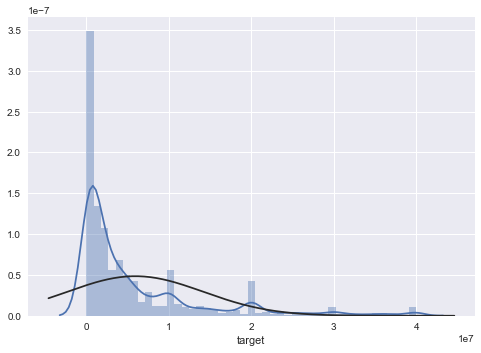

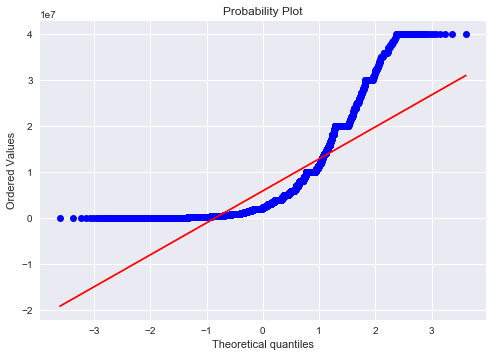

In [120]:
sns.distplot(Y,fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

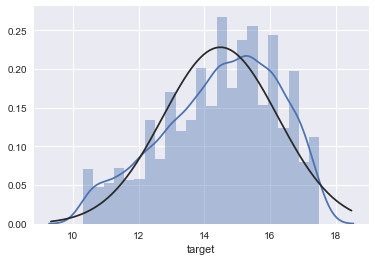

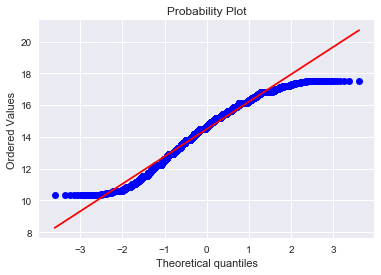

In [98]:
log_Y = np.log(Y)
sns.distplot(log_Y,fit=norm);
fig = plt.figure()
res = stats.probplot(log_Y, plot=plt)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [130]:
def rmsle(predicted, real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [100]:
grid_param_grid = {"n_estimators": [200, 500,1000],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion" :['mse','mae']}

In [144]:
# rmsle_score = make_scorer(rmsle, greater_is_better=False)
# grid = GridSearchCV(estimator=model, param_grid=grid_param_grid,cv=5, n_jobs=-1,scoring='rmsle_score')
model = RandomForestRegressor(n_jobs=-1,n_estimators=200,random_state=10)


In [167]:
#grid.fit(df_train_sample_tr,log_Y)
from sklearn.model_selection import cross_val_score
#rf_scores = cross_val_score(model, df_train_sample_tr, log_Y, cv=5, scoring=rmsle_score)
model.fit(df_train_sample_tr,log_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [151]:
log_ypred = model.predict(df_test_sample_tr)

array([ 14.58813777,  14.58813777,  15.22297332, ...,  14.229784  ,
        12.05194487,  15.86299665])

In [153]:
ypred = np.exp(log_ypred)
ID = df_test['ID']

In [156]:
sub = pd.DataFrame(ID,columns=['ID'])

In [157]:
sub['target'] = ypred

In [159]:
sub.to_csv('//tsclient/U/General/Stand/submission_0.1',index=False)

In [163]:
model.fit(df_train_sample_un_tr,log_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [164]:
log_ypred = model.predict(df_test_sample_un_tr)

In [165]:
ypred = np.exp(log_ypred)
sub = pd.DataFrame(ID,columns=['ID'])
sub['target'] = ypred

In [166]:
sub.to_csv('//tsclient/U/General/Stand/submission_0.2',index=False)

In [ ]:
###Cross Validation

In [170]:
print (np.mean(cross_val_score(model, df_train_sample_un_tr, log_Y, cv=10)))

0.317314288518


In [171]:
cross_val_score(model,df_train_sample_un_tr,log_Y,cv=10)

array([ 0.26044976,  0.32021273,  0.25272783,  0.356732  ,  0.35445935,
        0.32916991,  0.35473614,  0.2891805 ,  0.29350528,  0.36196938])

In [95]:
len(df_train_des['columns'][df_train_des['Corr']>df_train_des['Corr'].quantile(.75)])
#len(df_train_des['columns'][df_train_des['Std_Dev'] > df_train_des['Std_Dev'].quantile(.95)])

1184

In [74]:
df_train_des.head()

,columns,count,mean,std,min,25%,50%,75%,max,distinct_vals,Variance,Mean,Std_Dev,Corr
0,48df886f9,4459.0,14654.930101,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0,32,1.515437e+11,14654.930101,3.892862e+05,0.010188
1,0deb4b6a8,4459.0,1390.894819,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0,5,4.131381e+09,1390.894819,6.427582e+04,0.013805
2,34b15f335,4459.0,26722.450922,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0,29,3.247875e+11,26722.450922,5.699013e+05,0.014694
3,a8cb14b00,4459.0,4530.163714,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0,3,5.564218e+10,4530.163714,2.358860e+05,-0.002917
4,2f0771a37,4459.0,26409.957390,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0,6,2.293893e+12,26409.957390,1.514560e+06,0.016647


In [80]:
df_train_des['columns'][df_train_des['Variance']==0]

26      d5308d8bc
33      c330f1a67
36      eeac16933
57      7df8788e8
68      5b91580ee
177     6f29fbbc7
181     46dafc868
231     ae41a98b6
259     f416800e9
294     6d07828ca
298     7ac332a1d
301     70ee7950a
349     833b35a7c
357     2f9969eab
360     8b1372217
386     68322788b
433     2288ac1a6
443     dc7f76962
470     467044c26
471     39ebfbfd9
485     9a5ff8c23
503     f6fac27c8
516     664e2800e
523     ae28689a2
528     d87dcac58
563     4065efbb6
565     f944d9d43
581     c2c4491d5
600     a4346e2e2
611     1af366d4f
          ...    
4448    e5649663e
4456    6c16efbb8
4464    9118fd5ca
4472    ca8d565f1
4508    16a5bb8d2
4516    fd6347461
4518    f5179fb9c
4612    97428b646
4626    f684b0a96
4637    e4b2caa9f
4680    2c2d9f267
4694    96eb14eaf
4704    cb2cb460c
4714    86f843927
4717    ecd16fc60
4723    801c6dc8e
4725    f859a25b8
4737    ae846f332
4756    2252c7403
4771    fb9e07326
4784    d196ca1fd
4834    a8e562e8e
4847    eb6bb7ce1
4858    5beff147e
4860    52

In [89]:
df_train_des['columns'][df_train_des['max']==0]

26      d5308d8bc
33      c330f1a67
36      eeac16933
57      7df8788e8
68      5b91580ee
177     6f29fbbc7
181     46dafc868
231     ae41a98b6
259     f416800e9
294     6d07828ca
298     7ac332a1d
301     70ee7950a
349     833b35a7c
357     2f9969eab
360     8b1372217
386     68322788b
433     2288ac1a6
443     dc7f76962
470     467044c26
471     39ebfbfd9
485     9a5ff8c23
503     f6fac27c8
516     664e2800e
523     ae28689a2
528     d87dcac58
563     4065efbb6
565     f944d9d43
581     c2c4491d5
600     a4346e2e2
611     1af366d4f
          ...    
4448    e5649663e
4456    6c16efbb8
4464    9118fd5ca
4472    ca8d565f1
4508    16a5bb8d2
4516    fd6347461
4518    f5179fb9c
4612    97428b646
4626    f684b0a96
4637    e4b2caa9f
4680    2c2d9f267
4694    96eb14eaf
4704    cb2cb460c
4714    86f843927
4717    ecd16fc60
4723    801c6dc8e
4725    f859a25b8
4737    ae846f332
4756    2252c7403
4771    fb9e07326
4784    d196ca1fd
4834    a8e562e8e
4847    eb6bb7ce1
4858    5beff147e
4860    52

(array([ 2783.,   598.,   401.,   157.,   228.,    74.,    55.,    64.,
           39.,    60.]),
 array([  3.00000000e+04,   4.02700000e+06,   8.02400000e+06,
          1.20210000e+07,   1.60180000e+07,   2.00150000e+07,
          2.40120000e+07,   2.80090000e+07,   3.20060000e+07,
          3.60030000e+07,   4.00000000e+07]),
 <a list of 10 Patch objects>)

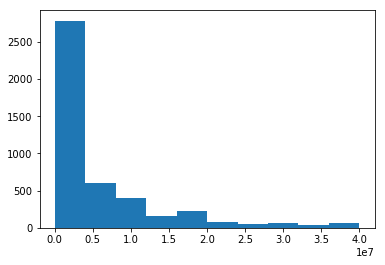

In [94]:
plt.hist(Y)

(array([ 197.,  192.,  282.,  387.,  510.,  656.,  635.,  606.,  542.,  452.]),
 array([ 10.30895266,  11.0284964 ,  11.74804013,  12.46758387,
         13.1871276 ,  13.90667134,  14.62621507,  15.34575881,
         16.06530254,  16.78484628,  17.50439001]),
 <a list of 10 Patch objects>)

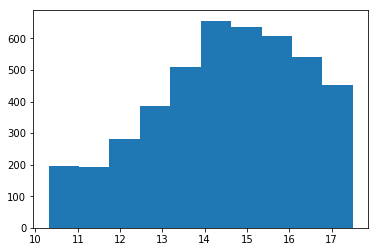

In [96]:
plt.hist(np.log(Y))

In [97]:
colsToRemove=[]
for c in df_train.columns:
    if c!='ID' and c!='target':
        if df_train[c].std()==0:
            colsToRemove.append(c)
            

In [99]:
print("The number of static features are {0}".format(len(colsToRemove)))

The number of static features are 256


In [101]:
df_train.shape

(4459, 4991)

In [107]:
df_train.drop(labels=colsToRemove,axis=1,inplace=True)

In [108]:
df_train.shape

(4459, 4735)

In [114]:
%%time
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break

    return dups

colsToRemove = duplicate_columns(df_train)
print(colsToRemove)

['34ceb0081', '8d57e2749', '168b3e5bc', 'a765da8bc', 'acc5b709d']
Wall time: 19min 34s


In [115]:
df_train.drop(colsToRemove, axis=1, inplace=True) 

In [116]:
def drop_sparse(train, test):
    flist = [x for x in train.columns if not x in ['ID','target']]
    for f in flist:
        if len(np.unique(train[f]))<2:
            train.drop(f, axis=1, inplace=True)
            test.drop(f, axis=1, inplace=True)
    return train, test

In [188]:
del pred_1

In [128]:
pred_1 = df_train[df_train.columns[:250]]

In [135]:
pred_1_col_names = pred_1.columns

In [129]:
model_1 = RandomForestRegressor(n_jobs=-1,n_estimators=2000,random_state=10,max_depth=2)

In [130]:
model_1.fit(pred_1,log_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [154]:
feats={}
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])
for feature,importance in zip(pred_1_col_names,model_1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').reset_index().rename(columns={'index':'Feature',0: 'Gini-importance'})
type(importances)

pandas.core.frame.DataFrame

In [159]:
feats={}
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])
for feature,importance in zip(pred_1_col_names,model_1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').reset_index().rename(columns={'index':'Feature_Name',0: 'Imp'})
df_fea_imp = df_fea_imp.append(importances)

In [158]:
df_fea_imp

,index,0
0,48df886f9,0.000276
1,0deb4b6a8,0.931560
2,34b15f335,0.000290
3,a8cb14b00,0.011468
4,2f0771a37,0.000000
5,30347e683,0.000000
6,d08d1fbe3,0.047659
7,6ee66e115,0.008747
8,20aa07010,0.000000
9,dc5a8f1d8,0.000000


In [243]:
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])

In [244]:
df_fea_imp['Feature_Name']=pred_1.columns

In [245]:
df_fea_imp['Imp'] = fea_imp

In [247]:
df_fea_imp_top5 = df_fea_imp.sort_values('Imp',ascending=False)[:5]

In [249]:
pred_2 = df_train[df_train.columns[1:251]]

In [250]:
model_1.fit(pred_2,log_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [251]:
fea_imp = model_1.feature_importances_

In [252]:
del df_fea_imp

In [253]:
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])
df_fea_imp['Feature_Name']=pred_1.columns
df_fea_imp['Imp'] = fea_imp

In [257]:
df_fea_imp_top5 = df_fea_imp_top5.append(df_fea_imp.sort_values('Imp',ascending=False)[:5])

In [261]:
i = 0
j = 500
model_1 = RandomForestRegressor(n_jobs=-1,n_estimators=2000,random_state=10,max_depth=2)
df_fea_imp_top5_v2 = pd.DataFrame(columns=['Feature_Name','Imp'])

In [ ]:
pred = df_train[df_train.columns[i:j]]
model_1.fit(pred,log_Y)
fea_imp = model_1.feature_importances_
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])
df_fea_imp['Feature_Name']=pred_1.columns
df_fea_imp['Imp'] = fea_imp
df_fea_imp_top5_v2 = df_fea_imp_top5.append(df_fea_imp.sort_values('Imp',ascending=False)[:5])
del df_fea_imp

In [267]:
from itertools import islice

def split_every(n, iterable):
    i = iter(iterable)
    piece = list(islice(i, n))
    while piece:
        yield piece
        piece = list(islice(i, n))

In [268]:
list(split_every(5, range(9)))

[[0, 1, 2, 3, 4], [5, 6, 7, 8]]

In [270]:
import itertools
def windows(iterable, length=2, overlap=0):
    it = iter(iterable)
    results = list(itertools.islice(it, length))
    while len(results) == length:
        yield results
        results = results[length-overlap:]
        results.extend(itertools.islice(it, length-overlap))
    if results:
        yield results

In [276]:
it = iter(list(df_train.columns[:5]))

In [280]:
list(df_train.columns[:5])

['48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00', '2f0771a37']

In [278]:
list(itertools.islice(it,3))

['48df886f9', '0deb4b6a8', '34b15f335']

In [37]:
prd = df_train.columns[0:499]

In [38]:
from numpy.lib.stride_tricks import as_strided

In [39]:
prd.size

499

In [56]:
nrows = ((prd.size-10)//2)+1
n = prd.strides[0]

In [58]:
S = 1
L = 10

In [51]:
nrows

165

In [52]:
prd.size

499

In [60]:
np.lib.stride_tricks.as_strided(prd,shape=(nrows,L),strides=(S*n,n))

245

In [61]:
prd_1 = df_train.columns[0:49]

In [104]:
nrows = ((prd_1.size-10)//5)+1
n = prd_1.strides[0]

In [108]:
nrows

8

In [105]:
predictors = np.lib.stride_tricks.as_strided(prd_1,shape=(nrows,L),strides=(S*n,n))

In [186]:
set(list(predictors.flat))

{'0deb4b6a8',
 '11d86fa6a',
 '20aa07010',
 '2f0771a37',
 '30347e683',
 '34b15f335',
 '4681de4fd',
 '48df886f9',
 '6ee66e115',
 '77c9823f2',
 '8d6c2a0b2',
 '96f83a237',
 'a8cb14b00',
 'adf119b9a',
 'cff75dd09',
 'd08d1fbe3',
 'dc5a8f1d8'}

In [125]:
fea_imp=[]
model_1 = RandomForestRegressor(n_jobs=-1,n_estimators=2000,random_state=10,max_depth=2)
df_fea_imp_top5_v2 = pd.DataFrame(columns=['Iter','Feature_Name','Imp'])
i = 1

In [121]:
df_train[predictors[0]].head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0


In [160]:
df_fea_imp = pd.DataFrame(columns=['Feature_Name','Imp'])
feats={}
for pred in predictors:
    model_1.fit(df_train[pred],log_Y)
    pred_1_col_names = df_train[pred].columns
    for feature,importance in zip(pred_1_col_names,model_1.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').reset_index().rename(columns={'index':'Feature_Name',0: 'Imp'})
    df_fea_imp = df_fea_imp.append(importances)    

In [283]:
df_fea_imp_sorted_sample = df_fea_imp.groupby(['Feature_Name'])['Imp'].mean().sort_values(ascending=False).reset_index()
df_fea_imp_sorted_sample.to_csv('//tsclient/U/General/Stand/fea_imp_sample.csv',index=False)

In [262]:
S = 1 # Stride length
L = 100
prd_all = df_train.columns
nrows_all = ((prd_all.size-100)//1)+1
n = prd_all.strides[0]

In [263]:
prd_all.size

4991

In [269]:
((prd_all.size-100)//1)+1

4892

In [265]:
prd_all.strides

(8,)

In [238]:
type(prd_all)

pandas.core.indexes.base.Index

In [266]:
predictors_all = np.lib.stride_tricks.as_strided(prd_all,shape=(nrows_all,L),strides=(S*n,n))

In [267]:
len(predictors_all)

4892

In [268]:
len(set(predictors_all.flat))

4991

In [270]:
predictors_all[4891]

array(['e369704a1', '7df9efba5', 'f5723deba', '7fd35c77a', '9d9e518a3',
       '99258443a', '1d81e197a', '831a9e087', 'de471ea65', '8781e4b91',
       'dc5ba677f', 'df3ac443c', '79203fbab', 'f1ab19e7a', '300398f1c',
       '6eefca12e', '22bf44001', '19915a6d3', '20a325694', '8afae1db8',
       'c283d4609', '11114a47a', 'b961b0d59', '103b8a033', '43d70cc4d',
       '09184c121', '08c089775', '572d36d31', '1de239e78', 'd7568383a',
       '8d7bfb911', '5964f1856', '6c7bf200b', 'b3058e9ba', '108fe14ef',
       'dcfcddf16', '5fad07863', 'b904b8345', '408021ef8', 'ef30f6be5',
       'e29d22b59', 'a19b05919', 'e849e3ae0', '05f11f48f', '49f11e712',
       'c959d372a', 'b625fe55a', 'f642213a6', '6df033973', '1834f29f5',
       '31e434a58', 'e431708ff', 'fb42abc0d', '88263a031', 'ab7764ead',
       'a380d5301', '46ee7f2c8', '2e1287e41', '23310aa6f', '9dc52515a',
       '969caa87a', '00302fe51', '1189ee335', 'ca04a07ca', 'f6f15ffa5',
       '841704460', 'ea5ed6ff7', 'b1bb8eac3', '8132d18b8', 'c24e

In [272]:
df_fea_imp_all = pd.DataFrame(columns=['Feature_Name','Imp'])
feats_all={}
for pred in predictors_all:
    model_1.fit(df_train[pred],log_Y)
    pred_1_col_names = df_train[pred].columns
    for feature,importance in zip(pred_1_col_names,model_1.feature_importances_):
        feats_all[feature] = importance
    importances = pd.DataFrame.from_dict(feats_all, orient='index').reset_index().rename(columns={'index':'Feature_Name',0: 'Imp'})
    df_fea_imp_all = df_fea_imp_all.append(importances)    

In [282]:
#df_fea_imp_all
df_fea_imp_sorted_all = df_fea_imp_all.groupby(['Feature_Name'])['Imp'].mean().sort_values(ascending=False).reset_index()
df_fea_imp_sorted_all.to_csv('//tsclient/U/General/Stand/fea_imp.csv',index=False)

In [287]:
#df_fea_imp_all
df_fea_imp_sorted_all_med = df_fea_imp_all.groupby(['Feature_Name'])['Imp'].median().sort_values(ascending=False).reset_index()
df_fea_imp_sorted_all_med.to_csv('//tsclient/U/General/Stand/fea_imp_median.csv',index=False)

In [286]:
#df_fea_imp_all
df_fea_imp_sorted_all_max = df_fea_imp_all.groupby(['Feature_Name'])['Imp'].max().sort_values(ascending=False).reset_index()
df_fea_imp_sorted_all_max.to_csv('//tsclient/U/General/Stand/fea_imp_max.csv',index=False)

In [288]:
#df_fea_imp_all
df_fea_imp_sorted_all_min = df_fea_imp_all.groupby(['Feature_Name'])['Imp'].min().sort_values(ascending=False).reset_index()
df_fea_imp_sorted_all_min.to_csv('//tsclient/U/General/Stand/fea_imp_min.csv',index=False)

In [298]:
rf_fea_imp = df_fea_imp_sorted_all.Feature_Name[df_fea_imp_sorted_all.Imp > 0.005]

In [299]:
df_train_rf_sample = df_train.filter(items=rf_fea_imp)
df_test_rf_sample = df_test.filter(items=rf_fea_imp)

In [300]:
df_train_sample_rf_tr = tr.fit_transform(df_train_rf_sample.values)
df_test_sample_rf_tr = tr.transform(df_test_rf_sample.values)

In [302]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=200,random_state=10)
model.fit(df_train_sample_rf_tr,log_Y)
log_ypred_rf = model.predict(df_test_sample_rf_tr)

In [311]:
ypred = np.exp(log_ypred_rf)
sub = pd.DataFrame(df_test['ID'],columns=['ID'])
sub['target'] = ypred

FileNotFoundError: [Errno 2] No such file or directory: '//tsclient/U/General/Stand/submission_rf.csv'

In [315]:
sub.to_csv('//tsclient/U/General/Stand/submission_rf.csv',index=False)

In [322]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca_result = pca.fit_transform(df_train.values)


In [324]:
np.sum(pca.explained_variance_ratio_)

0.64479657523316247

In [325]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [326]:
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4459 samples in 0.016s...
[t-SNE] Computed neighbors for 4459 samples in 2.948s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4459
[t-SNE] Computed conditional probabilities for sample 2000 / 4459
[t-SNE] Computed conditional probabilities for sample 3000 / 4459
[t-SNE] Computed conditional probabilities for sample 4000 / 4459
[t-SNE] Computed conditional probabilities for sample 4459 / 4459
[t-SNE] Mean sigma: 98647.654529
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.291969
[t-SNE] Error after 300 iterations: 1.884481
